# Análise exploratória de dados

Nesse *notebook* será analisado o conjunto de dados referente as empresas. O intuito dessa análise é buscar relações entre, verificar a qualidade dos dados e verificar a possibilidade de eliminação de *features* irrelevantes.

## Importação das bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.data_visualization import analyze_feature_data, analyze_grouped_feature_data

## Importaçao do conjunto de dados

In [3]:
df = pd.read_csv("estaticos_market.csv", index_col = 0)

In [4]:
df.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.describe()

,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,462298.000000,280.000000,176.000000,30684.000000,30684.000000,6590.000000,460371.000000,460371.000000,1760.000000,336.000000,...,76261.000000,76261.000000,76261.000000,103574.000000,103574.000000,103574.000000,73888.000000,74014.000000,103574.000000,462298.000000
mean,9.948677,32.014286,3.818182,2.244329,1.177813,5.769044,3.591801,48.699177,134.597159,15.934524,...,58.060498,96.661983,36.258851,12.324570,12.178529,14.343329,3.097607,-5.834288,9.510699,28.737044
std,9.615664,81.280168,6.797555,9.572536,6.589059,25.450950,72.600352,1206.696804,683.774506,29.708663,...,142.951278,279.541243,123.411370,222.456579,222.584458,239.885359,163.581549,443.825819,27.918737,468.626094
min,0.016438,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.933333,1.933333,1.933333,0.000000,0.000000,0.000000,-100.000000,-100.000000,0.000000,0.000000
25%,2.756164,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,...,25.203704,33.333333,6.966667,0.000000,0.000000,0.000000,0.000000,-44.444444,0.000000,0.000000
50%,6.704110,15.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,15.000000,3.000000,...,43.533333,61.766667,23.200000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,14.465753,30.000000,4.000000,2.000000,1.000000,4.000000,0.000000,0.000000,66.250000,8.000000,...,68.883333,96.266667,46.500000,5.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000
max,106.432877,1215.000000,50.000000,489.000000,363.000000,1017.000000,9782.000000,122090.000000,11922.000000,108.000000,...,5099.066667,5099.066667,5099.066667,51547.000000,51547.000000,54205.000000,27800.000000,87300.000000,1400.000000,9647.000000


## Verificação de valores duplicados

In [6]:
print("Existem {} valores duplicados nesse conjunto de dados." .format(df.duplicated().sum()))

Existem 0 valores duplicados nesse conjunto de dados.


## Verificação dos valores faltantes e remoção dos valores irrelevantes

In [7]:
df_na = pd.DataFrame(data = {"Faltantes": 100*df.isna().sum()/df.shape[0]}).sort_values(by = "Faltantes", 
                                                                                ascending = True)

In [8]:
df_na.head(10)

,Faltantes
id,0.0
fl_rm,0.0
fl_telefone,0.0
fl_email,0.0
fl_st_especial,0.0
fl_ltda,0.0
fl_mei,0.0
fl_epp,0.0
fl_sa,0.0
qt_filiais,0.0


In [9]:
sel = df_na["Faltantes"] > 0
df_sel = df_na[sel]
print("Existem {} features com valores faltantes nesse conjunto de dados." .format(df_sel.shape[0]))
sel = df_na["Faltantes"] == 100
df_sel = df_na[sel]
print("Existem {} features sem nenhum valor." .format(df_sel.shape[0]))
print("###############################################################")
for i in range(9):
    sel = df_na["Faltantes"]>= 10*(i + 1)
    df_sel = df_na[sel]
    print("{} features tem mais de {}% de seus valores faltantes." .format(df_sel.shape[0], 10*(i + 1)))

Existem 163 features com valores faltantes nesse conjunto de dados.
Existem 5 features sem nenhum valor.
###############################################################
143 features tem mais de 10% de seus valores faltantes.
139 features tem mais de 20% de seus valores faltantes.
136 features tem mais de 30% de seus valores faltantes.
131 features tem mais de 40% de seus valores faltantes.
131 features tem mais de 50% de seus valores faltantes.
130 features tem mais de 60% de seus valores faltantes.
129 features tem mais de 70% de seus valores faltantes.
115 features tem mais de 80% de seus valores faltantes.
58 features tem mais de 90% de seus valores faltantes.


As *features* sem nenhum valor serão removidas, já que nenhuma informação pode ser retirada delas.

In [10]:
sel = df_na["Faltantes"] == 100
df_sel = df_na[sel]
df.drop(columns = list(df_sel.index), inplace = True)
df_na = pd.DataFrame(data = {"Faltantes": 100*df.isna().sum()/df.shape[0]}).sort_values(by = "Faltantes", 
                                                                                ascending = True)

Como muitas *features* tem valores faltantes, as com uma porcentagem de valores acima de determinado limiar serão removidas.

In [11]:
sel = df_na["Faltantes"] >= 40
df_sel = df_na[sel]
df.drop(columns = list(df_sel.index), inplace = True)
df_na = pd.DataFrame(data = {"Faltantes": 100*df.isna().sum()/df.shape[0]}).sort_values(by = "Faltantes", 
                                                                                ascending = True)

In [12]:
print("Sobraram {} features no conjunto de dados." .format(df.shape[1]))

Sobraram 50 features no conjunto de dados.


### *Features* selecionadas para análise

In [13]:
for i, j in enumerate(list(df.columns)):
    txt = "Feature {} - {}." .format(i, j)
    print(txt)

Feature 0 - id.
Feature 1 - fl_matriz.
Feature 2 - de_natureza_juridica.
Feature 3 - sg_uf.
Feature 4 - natureza_juridica_macro.
Feature 5 - de_ramo.
Feature 6 - setor.
Feature 7 - idade_empresa_anos.
Feature 8 - idade_emp_cat.
Feature 9 - fl_me.
Feature 10 - fl_sa.
Feature 11 - fl_epp.
Feature 12 - fl_mei.
Feature 13 - fl_ltda.
Feature 14 - dt_situacao.
Feature 15 - fl_st_especial.
Feature 16 - fl_email.
Feature 17 - fl_telefone.
Feature 18 - fl_rm.
Feature 19 - nm_divisao.
Feature 20 - nm_segmento.
Feature 21 - fl_spa.
Feature 22 - fl_antt.
Feature 23 - fl_veiculo.
Feature 24 - fl_optante_simples.
Feature 25 - vl_total_veiculos_pesados_grupo.
Feature 26 - vl_total_veiculos_leves_grupo.
Feature 27 - fl_optante_simei.
Feature 28 - sg_uf_matriz.
Feature 29 - de_saude_tributaria.
Feature 30 - de_saude_rescencia.
Feature 31 - nu_meses_rescencia.
Feature 32 - de_nivel_atividade.
Feature 33 - fl_simples_irregular.
Feature 34 - empsetorcensitariofaixarendapopulacao.
Feature 35 - nm_meso_regi

## Link com conjunto de dados de clientes

In [14]:
df_1 = pd.read_csv("estaticos_portfolio1.csv", index_col = 0)
df_2 = pd.read_csv("estaticos_portfolio2.csv", index_col = 0)
df_3 = pd.read_csv("estaticos_portfolio3.csv", index_col = 0)

In [15]:
clients_list_1 = list(df_1["id"].values)
clients_list_2 = list(df_2["id"].values)
clients_list_3 = list(df_3["id"].values)

In [16]:
df["emp_1"] = df["id"].apply(lambda x: 1 if x in clients_list_1 else 0)
df["emp_2"] = df["id"].apply(lambda x: 1 if x in clients_list_2 else 0)
df["emp_3"] = df["id"].apply(lambda x: 1 if x in clients_list_3 else 0)

## Análise das *features*

### Análise

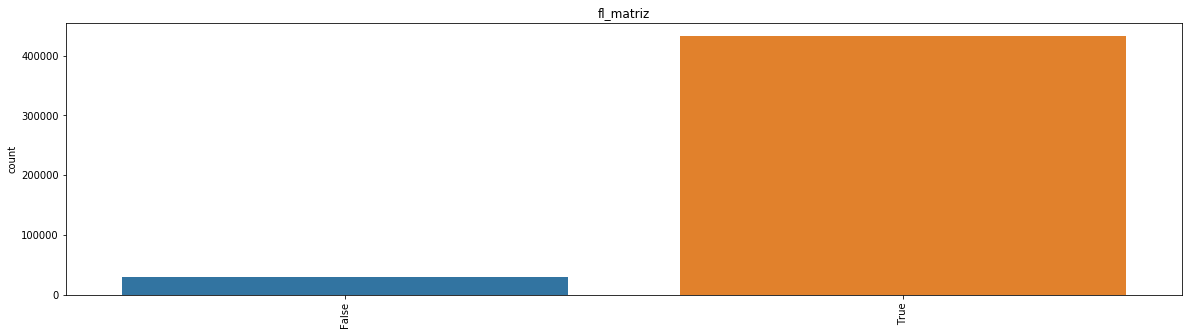

In [17]:
analyze_feature_data(df, "fl_matriz", "C")

In [18]:
analyze_grouped_feature_data(df, "fl_matriz", "C")

###################################################
Empresa 1
False - 36
True - 519
###################################################
Empresa 2
False - 0
True - 566
###################################################
Empresa 3
False - 0
True - 265


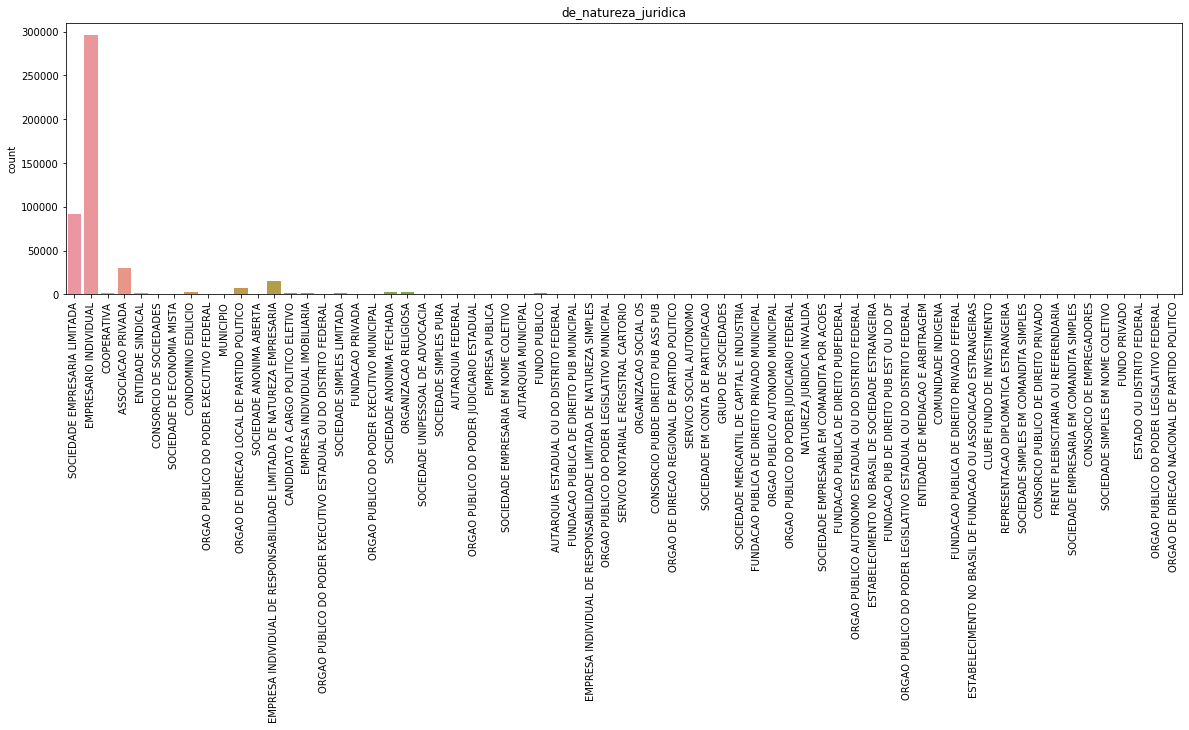

In [19]:
analyze_feature_data(df, "de_natureza_juridica", "C")

In [20]:
analyze_grouped_feature_data(df, "de_natureza_juridica", "C")

###################################################
Empresa 1
ASSOCIACAO PRIVADA - 0
AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL - 0
AUTARQUIA FEDERAL - 0
AUTARQUIA MUNICIPAL - 0
CANDIDATO A CARGO POLITICO ELETIVO - 0
CLUBE FUNDO DE INVESTIMENTO - 0
COMUNIDADE INDIGENA - 0
CONDOMINIO EDILICIO - 0
CONSORCIO DE EMPREGADORES - 0
CONSORCIO DE SOCIEDADES - 0
CONSORCIO PUBDE DIREITO PUB ASS PUB - 0
CONSORCIO PUBLICO DE DIREITO PRIVADO - 0
COOPERATIVA - 0
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA - 15
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES - 0
EMPRESA INDIVIDUAL IMOBILIARIA - 0
EMPRESA PUBLICA - 0
EMPRESARIO INDIVIDUAL - 432
ENTIDADE DE MEDIACAO E ARBITRAGEM - 0
ENTIDADE SINDICAL - 0
ESTABELECIMENTO NO BRASIL DE FUNDACAO OU ASSOCIACAO ESTRANGEIRAS - 0
ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA - 0
ESTADO OU DISTRITO FEDERAL - 0
FRENTE PLEBISCITARIA OU REFERENDARIA - 0
FUNDACAO PRIVADA - 0
FUNDACAO PUB DE DIREITO PUB EST OU DO DF 

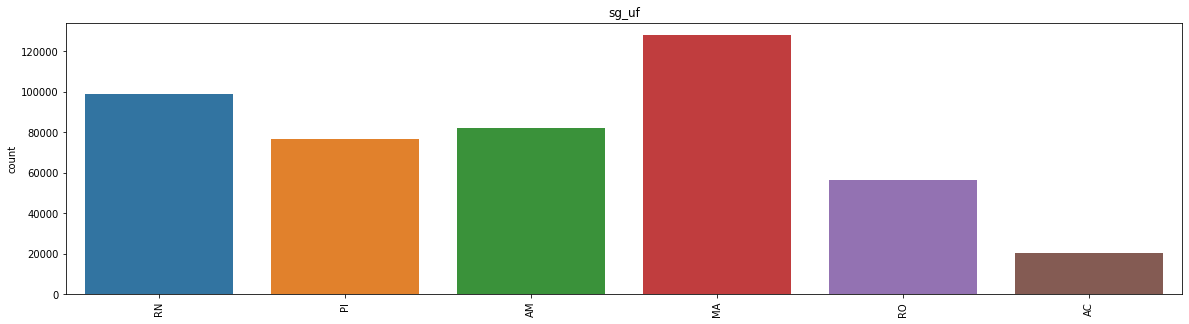

In [24]:
analyze_feature_data(df, "sg_uf", "C")

In [25]:
analyze_grouped_feature_data(df, "sg_uf", "C")

###################################################
Empresa 1
AC - 21
AM - 94
MA - 157
PI - 103
RN - 116
RO - 64
###################################################
Empresa 2
AC - 35
AM - 142
MA - 118
PI - 101
RN - 100
RO - 70
###################################################
Empresa 3
AC - 23
AM - 43
MA - 74
PI - 52
RN - 51
RO - 22


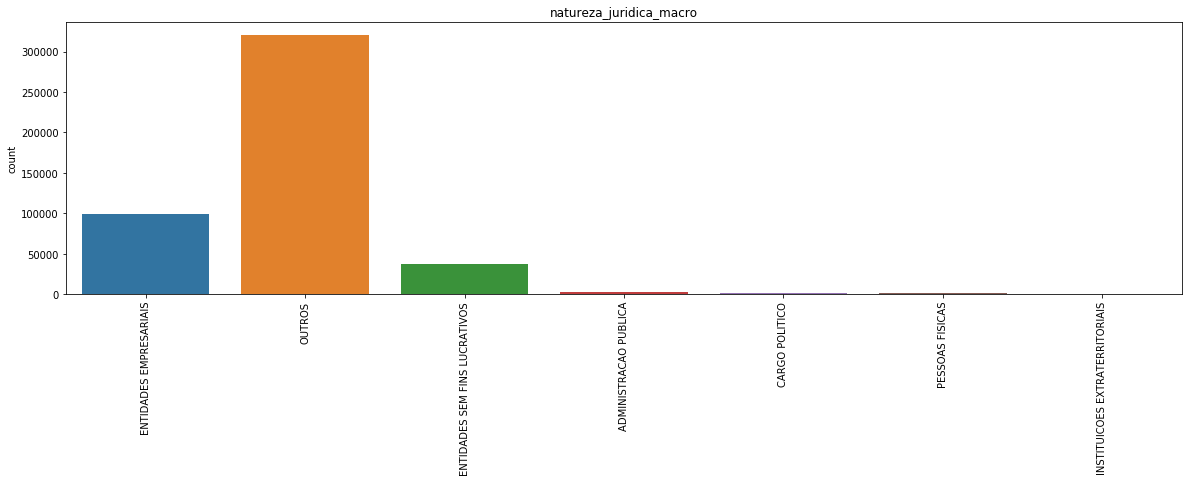

In [26]:
analyze_feature_data(df, "natureza_juridica_macro", "C")

In [27]:
analyze_grouped_feature_data(df, "natureza_juridica_macro", "C")

###################################################
Empresa 1
ADMINISTRACAO PUBLICA - 0
CARGO POLITICO - 0
ENTIDADES EMPRESARIAIS - 108
ENTIDADES SEM FINS LUCRATIVOS - 0
INSTITUICOES EXTRATERRITORIAIS - 0
OUTROS - 447
PESSOAS FISICAS - 0
###################################################
Empresa 2
ADMINISTRACAO PUBLICA - 56
CARGO POLITICO - 0
ENTIDADES EMPRESARIAIS - 323
ENTIDADES SEM FINS LUCRATIVOS - 35
INSTITUICOES EXTRATERRITORIAIS - 0
OUTROS - 152
PESSOAS FISICAS - 0
###################################################
Empresa 3
ADMINISTRACAO PUBLICA - 47
CARGO POLITICO - 0
ENTIDADES EMPRESARIAIS - 73
ENTIDADES SEM FINS LUCRATIVOS - 17
INSTITUICOES EXTRATERRITORIAIS - 0
OUTROS - 128
PESSOAS FISICAS - 0


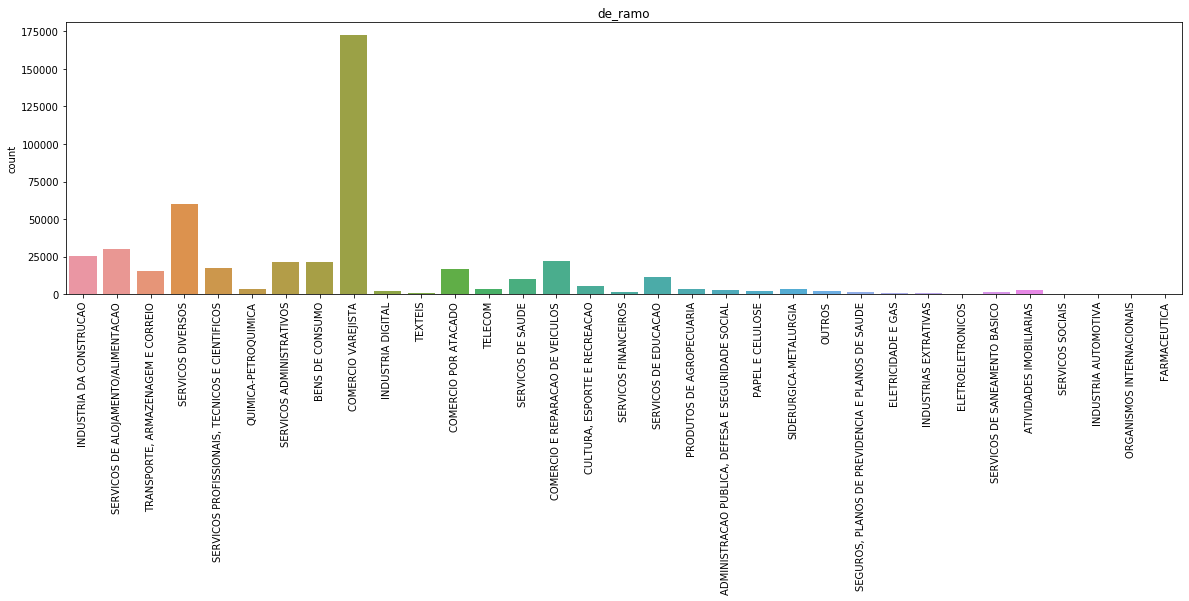

In [28]:
analyze_feature_data(df, "de_ramo", "C")

In [29]:
analyze_grouped_feature_data(df, "de_ramo", "C")

###################################################
Empresa 1
ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL - 0
ATIVIDADES IMOBILIARIAS - 0
BENS DE CONSUMO - 59
COMERCIO E REPARACAO DE VEICULOS - 0
COMERCIO POR ATACADO - 0
COMERCIO VAREJISTA - 496
CULTURA, ESPORTE E RECREACAO - 0
ELETRICIDADE E GAS - 0
ELETROELETRONICOS - 0
FARMACEUTICA - 0
INDUSTRIA AUTOMOTIVA - 0
INDUSTRIA DA CONSTRUCAO - 0
INDUSTRIA DIGITAL - 0
INDUSTRIAS EXTRATIVAS - 0
ORGANISMOS INTERNACIONAIS - 0
OUTROS - 0
PAPEL E CELULOSE - 0
PRODUTOS DE AGROPECUARIA - 0
QUIMICA-PETROQUIMICA - 0
SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE - 0
SERVICOS ADMINISTRATIVOS - 0
SERVICOS DE ALOJAMENTO/ALIMENTACAO - 0
SERVICOS DE EDUCACAO - 0
SERVICOS DE SANEAMENTO BASICO - 0
SERVICOS DE SAUDE - 0
SERVICOS DIVERSOS - 0
SERVICOS FINANCEIROS - 0
SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS - 0
SERVICOS SOCIAIS - 0
SIDERURGICA-METALURGIA - 0
TELECOM - 0
TEXTEIS - 0
TRANSPORTE, ARMAZENAGEM E CORREIO - 0
##########################

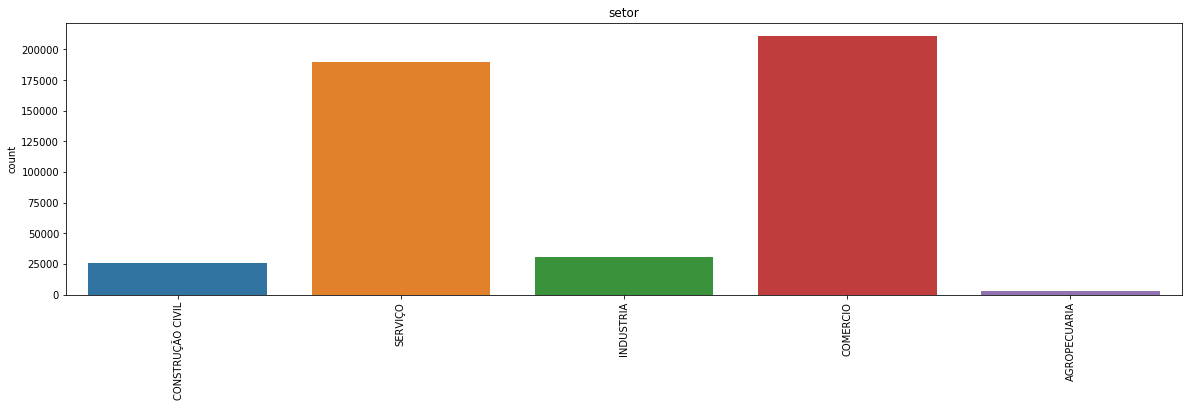

In [30]:
analyze_feature_data(df, "setor", "C")

In [31]:
analyze_grouped_feature_data(df, "setor", "C")

###################################################
Empresa 1
AGROPECUARIA - 0
COMERCIO - 496
CONSTRUÇÃO CIVIL - 0
INDUSTRIA - 52
SERVIÇO - 7
###################################################
Empresa 2
AGROPECUARIA - 8
COMERCIO - 107
CONSTRUÇÃO CIVIL - 46
INDUSTRIA - 69
SERVIÇO - 336
###################################################
Empresa 3
AGROPECUARIA - 0
COMERCIO - 0
CONSTRUÇÃO CIVIL - 0
INDUSTRIA - 0
SERVIÇO - 265


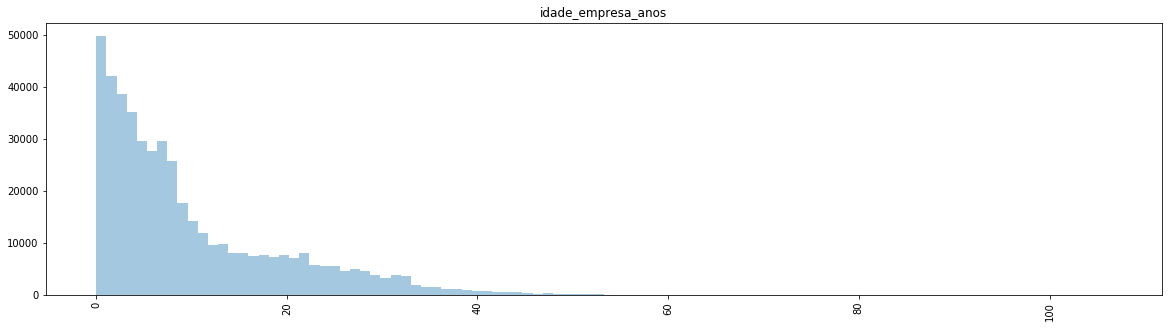

In [32]:
analyze_feature_data(df, "idade_empresa_anos", "N")

In [33]:
analyze_grouped_feature_data(df, "idade_empresa_anos", "N")

###################################################
Empresa 1
0 - 9.948447501143825
1 - 10.13924719239788
###################################################
Empresa 2
0 - 9.927789808451044
1 - 26.98769059489812
###################################################
Empresa 3
0 - 9.93845940376279
1 - 27.76250193848538


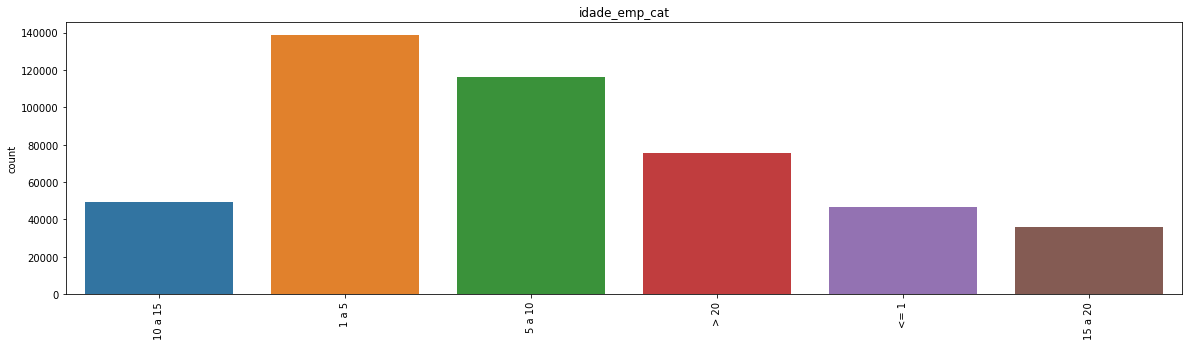

In [34]:
analyze_feature_data(df, "idade_emp_cat", "C")

In [35]:
analyze_grouped_feature_data(df, "idade_emp_cat", "C")

###################################################
Empresa 1
1 a 5 - 157
10 a 15 - 55
15 a 20 - 51
5 a 10 - 144
<= 1 - 56
> 20 - 92
###################################################
Empresa 2
1 a 5 - 0
10 a 15 - 98
15 a 20 - 89
5 a 10 - 0
<= 1 - 0
> 20 - 379
###################################################
Empresa 3
1 a 5 - 7
10 a 15 - 21
15 a 20 - 33
5 a 10 - 27
<= 1 - 1
> 20 - 176


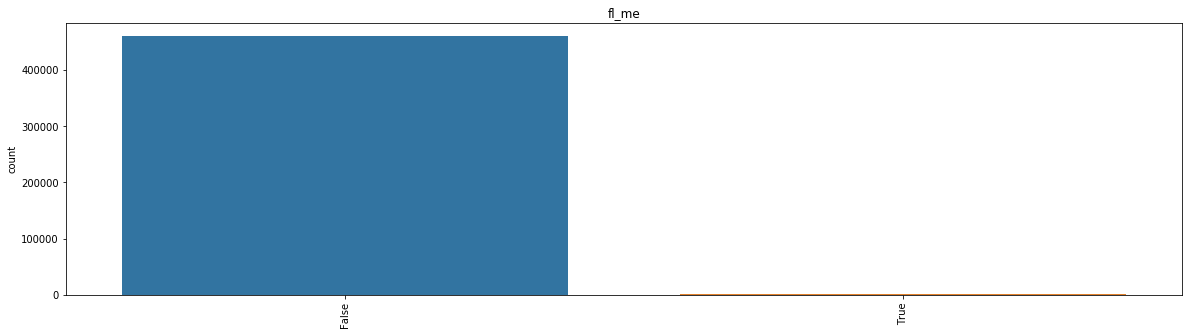

In [36]:
analyze_feature_data(df, "fl_me", "C")

In [37]:
analyze_grouped_feature_data(df, "fl_me", "C")

###################################################
Empresa 1
False - 553
True - 2
###################################################
Empresa 2
False - 564
True - 2
###################################################
Empresa 3
False - 265
True - 0


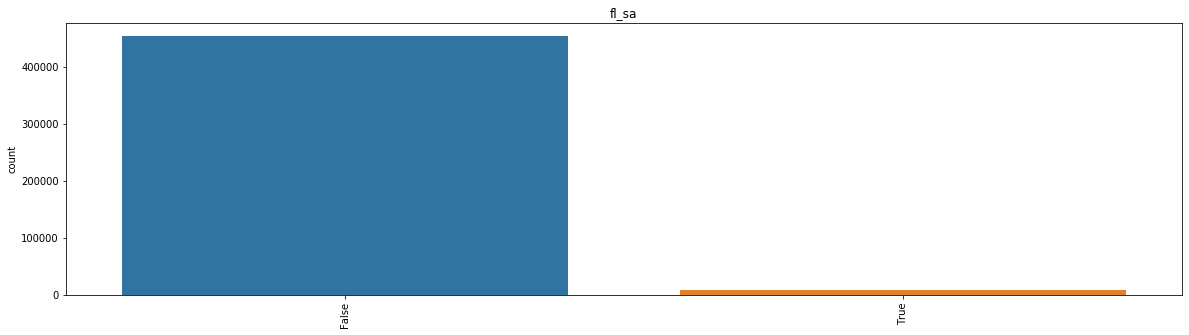

In [38]:
analyze_feature_data(df, "fl_sa", "C")

In [39]:
analyze_grouped_feature_data(df, "fl_sa", "C")

###################################################
Empresa 1
False - 546
True - 9
###################################################
Empresa 2
False - 543
True - 23
###################################################
Empresa 3
False - 260
True - 5


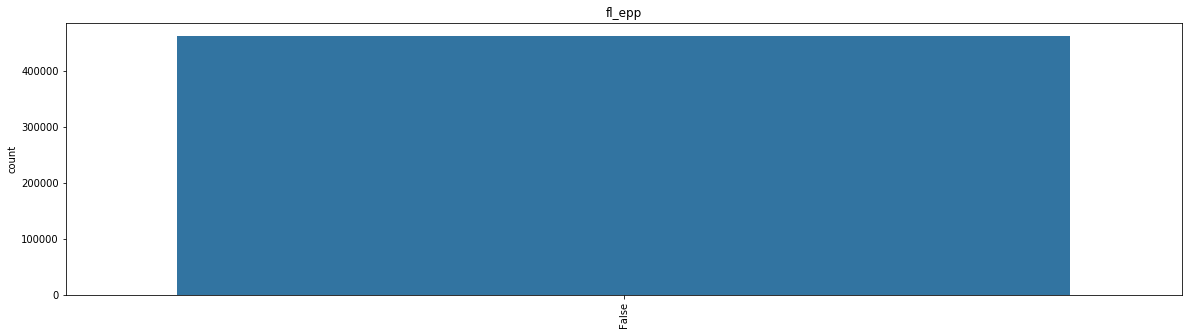

In [40]:
analyze_feature_data(df, "fl_epp", "C")

In [41]:
analyze_grouped_feature_data(df, "fl_epp", "C")

###################################################
Empresa 1
False - 555
###################################################
Empresa 2
False - 566
###################################################
Empresa 3
False - 265


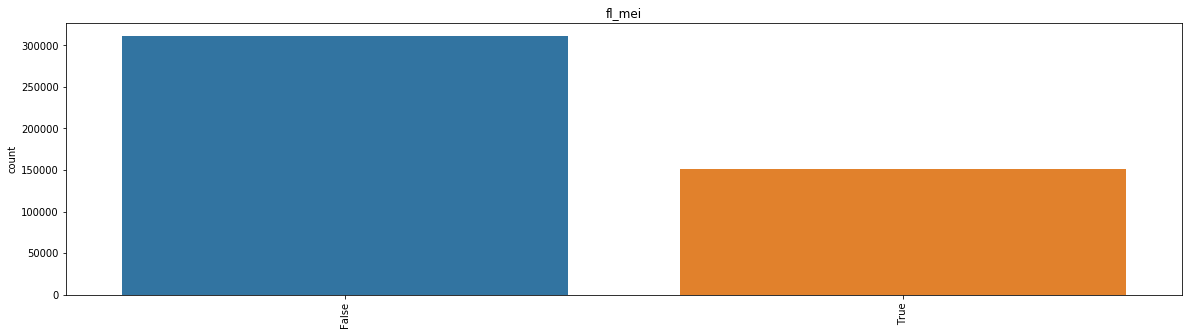

In [42]:
analyze_feature_data(df, "fl_mei", "C")

In [43]:
analyze_grouped_feature_data(df, "fl_mei", "C")

###################################################
Empresa 1
False - 337
True - 218
###################################################
Empresa 2
False - 566
True - 0
###################################################
Empresa 3
False - 265
True - 0


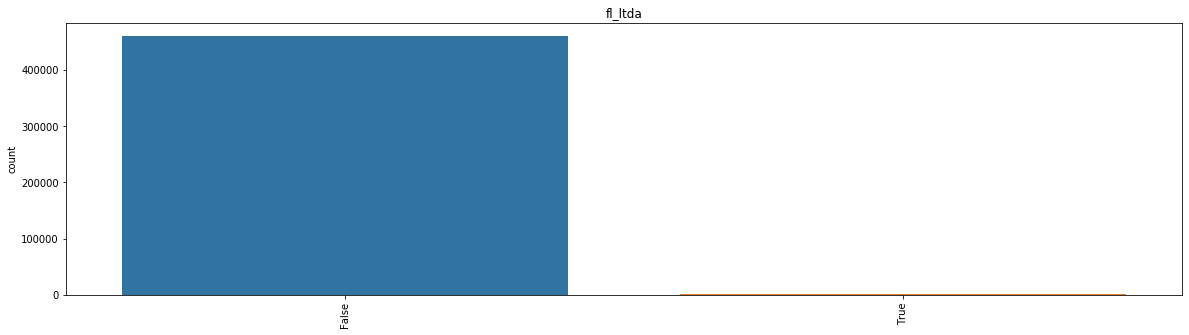

In [44]:
analyze_feature_data(df, "fl_ltda", "C")

In [45]:
analyze_grouped_feature_data(df, "fl_ltda", "C")

###################################################
Empresa 1
False - 555
True - 0
###################################################
Empresa 2
False - 562
True - 4
###################################################
Empresa 3
False - 264
True - 1


In [46]:
# analyze_feature_data(df, "dt_situacao", "C")

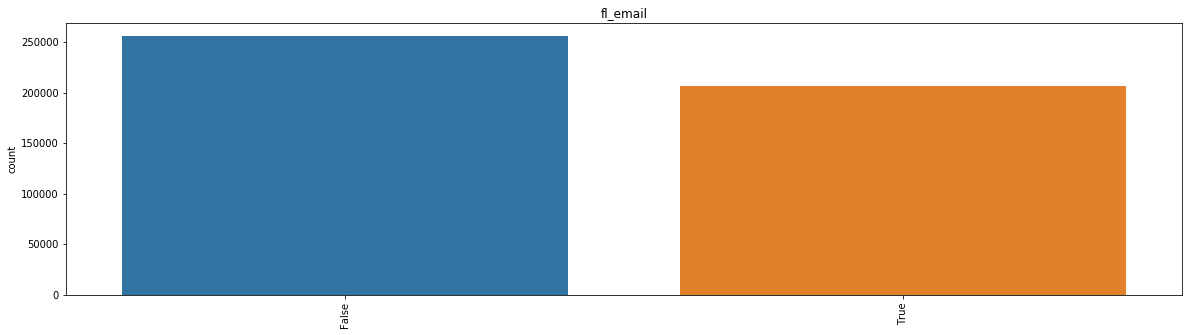

In [47]:
analyze_feature_data(df, "fl_email", "C")

In [48]:
analyze_grouped_feature_data(df, "fl_email", "C")

###################################################
Empresa 1
False - 300
True - 255
###################################################
Empresa 2
False - 304
True - 262
###################################################
Empresa 3
False - 147
True - 118


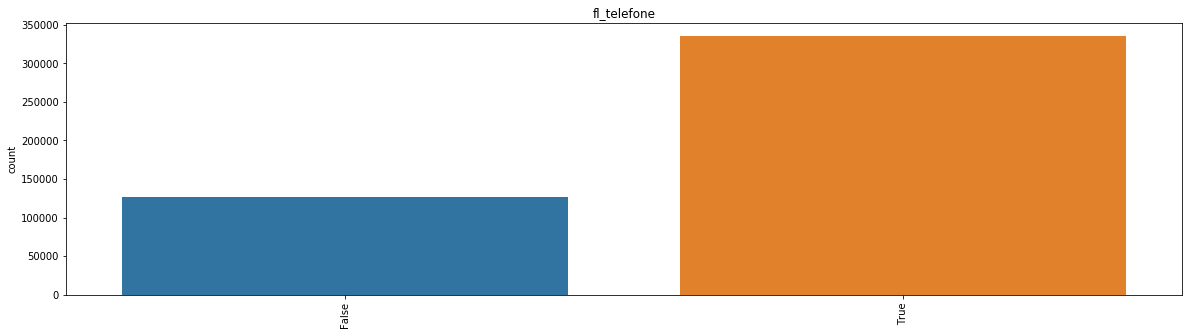

In [49]:
analyze_feature_data(df, "fl_telefone", "C")

In [50]:
analyze_grouped_feature_data(df, "fl_telefone", "C")

###################################################
Empresa 1
False - 155
True - 400
###################################################
Empresa 2
False - 259
True - 307
###################################################
Empresa 3
False - 133
True - 132


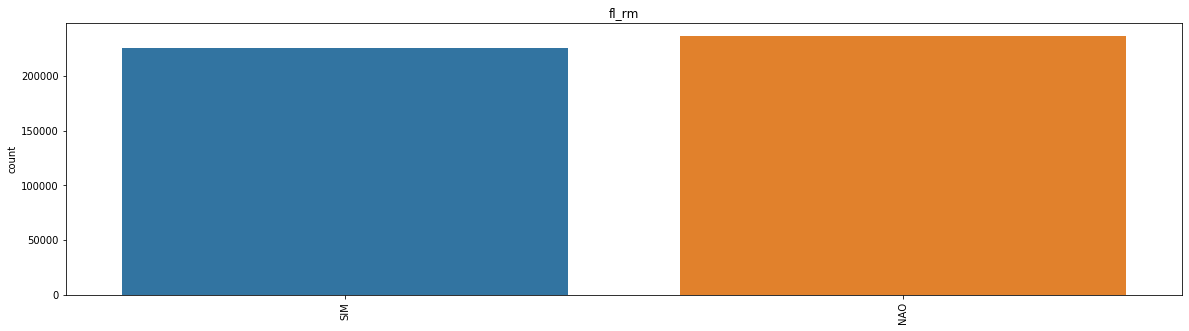

In [51]:
analyze_feature_data(df, "fl_rm", "C")

In [52]:
analyze_grouped_feature_data(df, "fl_rm", "C")

###################################################
Empresa 1
NAO - 311
SIM - 244
###################################################
Empresa 2
NAO - 259
SIM - 307
###################################################
Empresa 3
NAO - 145
SIM - 120


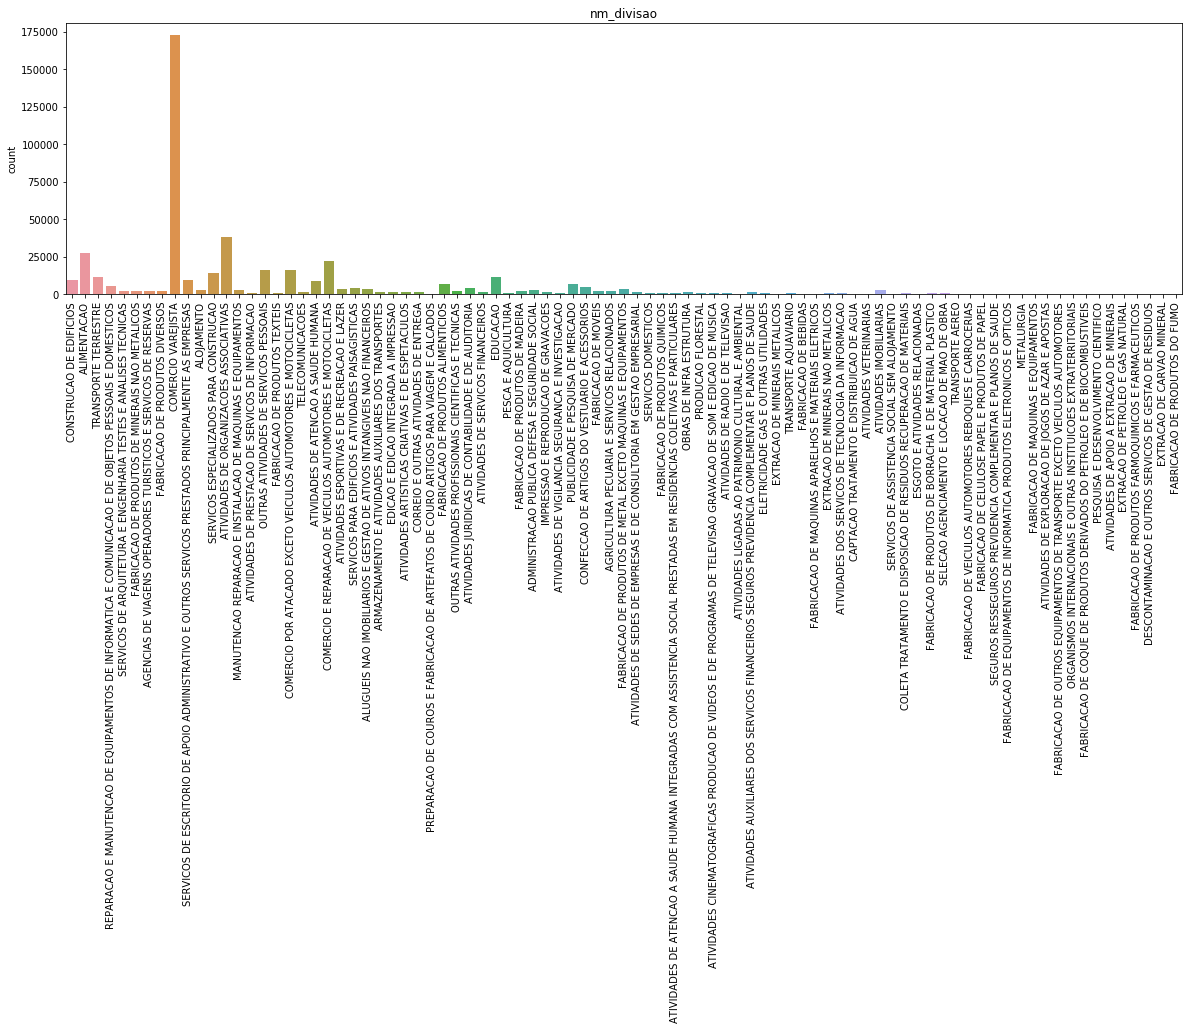

In [53]:
analyze_feature_data(df, "nm_divisao", "C")

In [54]:
analyze_grouped_feature_data(df, "nm_divisao", "C")

###################################################
Empresa 1
ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL - 0
AGENCIAS DE VIAGENS OPERADORES TURISTICOS E SERVICOS DE RESERVAS - 0
AGRICULTURA PECUARIA E SERVICOS RELACIONADOS - 0
ALIMENTACAO - 0
ALOJAMENTO - 0
ALUGUEIS NAO IMOBILIARIOS E GESTAO DE ATIVOS INTANGIVEIS NAO FINANCEIROS - 0
ARMAZENAMENTO E ATIVIDADES AUXILIARES DOS TRANSPORTES - 0
ATIVIDADES ARTISTICAS CRIATIVAS E DE ESPETACULOS - 0
ATIVIDADES AUXILIARES DOS SERVICOS FINANCEIROS SEGUROS PREVIDENCIA COMPLEMENTAR E PLANOS DE SAUDE - 0
ATIVIDADES CINEMATOGRAFICAS PRODUCAO DE VIDEOS E DE PROGRAMAS DE TELEVISAO GRAVACAO DE SOM E EDICAO DE MUSICA - 0
ATIVIDADES DE APOIO A EXTRACAO DE MINERAIS - 0
ATIVIDADES DE ATENCAO A SAUDE HUMANA - 0
ATIVIDADES DE ATENCAO A SAUDE HUMANA INTEGRADAS COM ASSISTENCIA SOCIAL PRESTADAS EM RESIDENCIAS COLETIVAS E PARTICULARES - 0
ATIVIDADES DE EXPLORACAO DE JOGOS DE AZAR E APOSTAS - 0
ATIVIDADES DE ORGANIZACOES ASSOCIATIVAS - 0
ATIVIDADES DE PREST

ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL - 150
AGENCIAS DE VIAGENS OPERADORES TURISTICOS E SERVICOS DE RESERVAS - 0
AGRICULTURA PECUARIA E SERVICOS RELACIONADOS - 0
ALIMENTACAO - 4
ALOJAMENTO - 1
ALUGUEIS NAO IMOBILIARIOS E GESTAO DE ATIVOS INTANGIVEIS NAO FINANCEIROS - 3
ARMAZENAMENTO E ATIVIDADES AUXILIARES DOS TRANSPORTES - 0
ATIVIDADES ARTISTICAS CRIATIVAS E DE ESPETACULOS - 1
ATIVIDADES AUXILIARES DOS SERVICOS FINANCEIROS SEGUROS PREVIDENCIA COMPLEMENTAR E PLANOS DE SAUDE - 0
ATIVIDADES CINEMATOGRAFICAS PRODUCAO DE VIDEOS E DE PROGRAMAS DE TELEVISAO GRAVACAO DE SOM E EDICAO DE MUSICA - 0
ATIVIDADES DE APOIO A EXTRACAO DE MINERAIS - 0
ATIVIDADES DE ATENCAO A SAUDE HUMANA - 12
ATIVIDADES DE ATENCAO A SAUDE HUMANA INTEGRADAS COM ASSISTENCIA SOCIAL PRESTADAS EM RESIDENCIAS COLETIVAS E PARTICULARES - 1
ATIVIDADES DE EXPLORACAO DE JOGOS DE AZAR E APOSTAS - 0
ATIVIDADES DE ORGANIZACOES ASSOCIATIVAS - 3
ATIVIDADES DE PRESTACAO DE SERVICOS DE INFORMACAO - 1
ATIVIDADES DE RADIO E DE

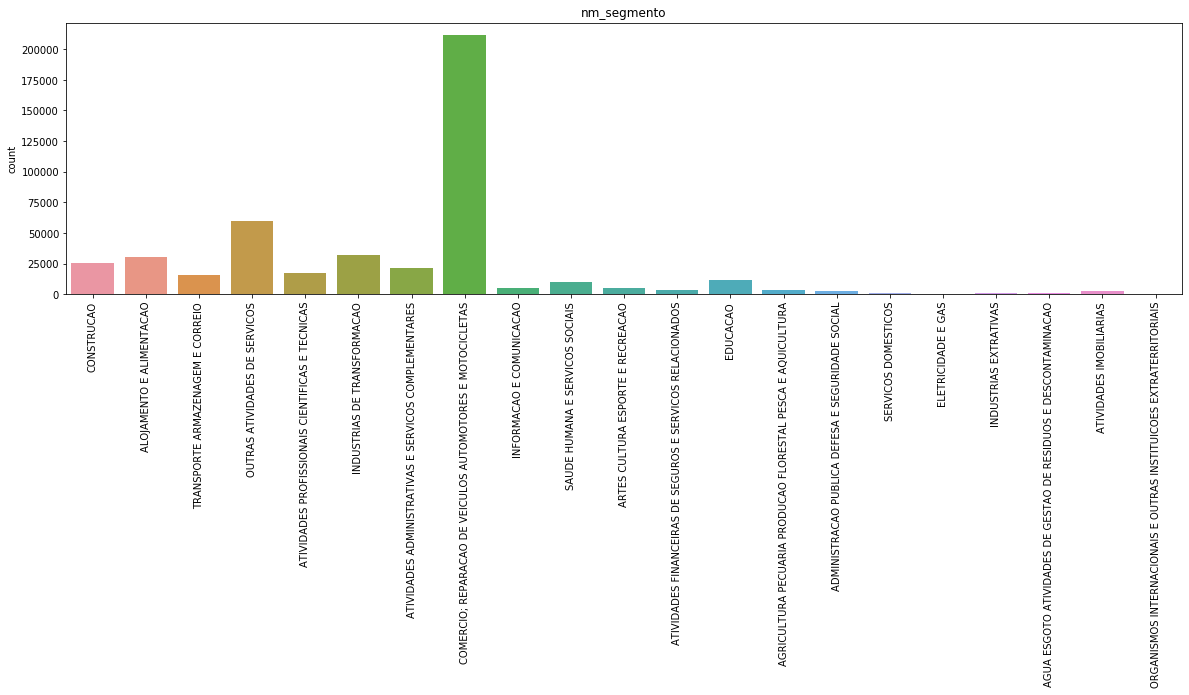

In [55]:
analyze_feature_data(df, "nm_segmento", "C")

In [93]:
analyze_grouped_feature_data(df, "nm_segmento", "C")

###################################################
Empresa 1
ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL - 0
AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E AQUICULTURA - 0
AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E DESCONTAMINACAO - 0
ALOJAMENTO E ALIMENTACAO - 0
ARTES CULTURA ESPORTE E RECREACAO - 0
ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES - 0
ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS - 0
ATIVIDADES IMOBILIARIAS - 0
ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS - 0
COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS - 496
CONSTRUCAO - 0
EDUCACAO - 0
ELETRICIDADE E GAS - 0
INDUSTRIAS DE TRANSFORMACAO - 59
INDUSTRIAS EXTRATIVAS - 0
INFORMACAO E COMUNICACAO - 0
ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUICOES EXTRATERRITORIAIS - 0
OUTRAS ATIVIDADES DE SERVICOS - 0
SAUDE HUMANA E SERVICOS SOCIAIS - 0
SERVICOS DOMESTICOS - 0
TRANSPORTE ARMAZENAGEM E CORREIO - 0
###################################################
Empresa 2
ADMINISTRACAO PUBLICA

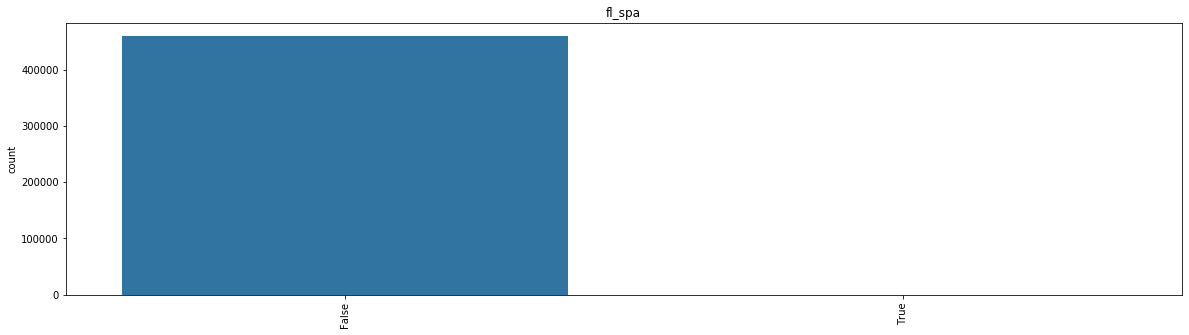

In [56]:
analyze_feature_data(df, "fl_spa", "C")

In [57]:
analyze_grouped_feature_data(df, "fl_spa", "C")

###################################################
Empresa 1
False - 555
True - 0
###################################################
Empresa 2
False - 539
True - 27
###################################################
Empresa 3
False - 255
True - 10


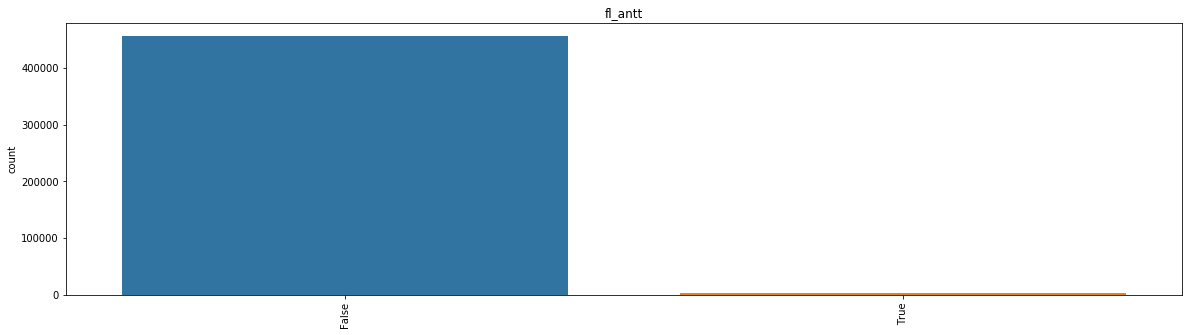

In [58]:
analyze_feature_data(df, "fl_antt", "C")

In [59]:
analyze_grouped_feature_data(df, "fl_antt", "C")

###################################################
Empresa 1
False - 551
True - 4
###################################################
Empresa 2
False - 474
True - 92
###################################################
Empresa 3
False - 253
True - 12


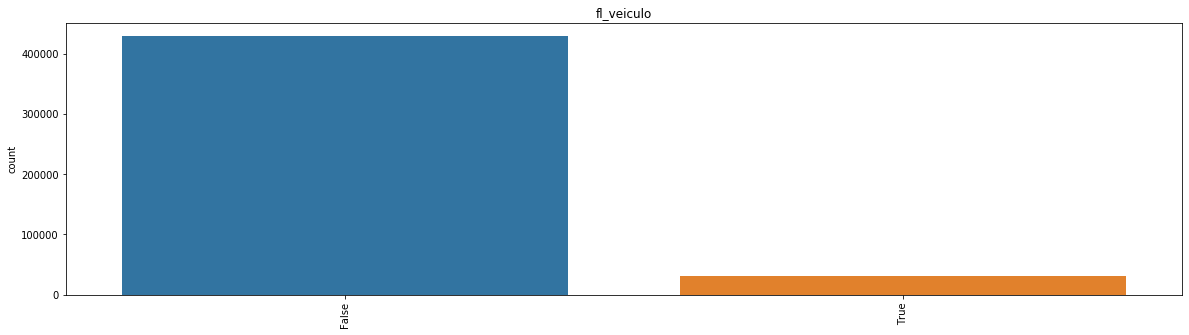

In [60]:
analyze_feature_data(df, "fl_veiculo", "C")

In [61]:
analyze_grouped_feature_data(df, "fl_veiculo", "C")

###################################################
Empresa 1
False - 517
True - 38
###################################################
Empresa 2
False - 76
True - 490
###################################################
Empresa 3
False - 44
True - 221


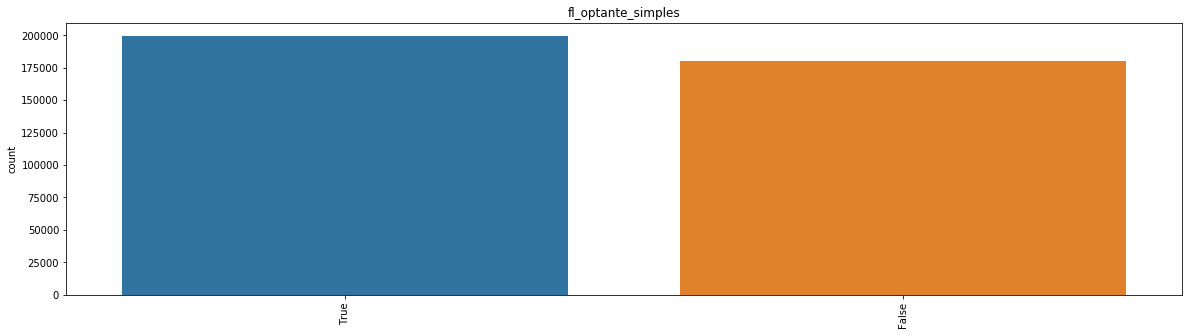

In [62]:
analyze_feature_data(df, "fl_optante_simples", "C")

In [63]:
analyze_grouped_feature_data(df, "fl_optante_simples", "C")

###################################################
Empresa 1
False - 168
True - 286
###################################################
Empresa 2
False - 539
True - 27
###################################################
Empresa 3
False - 252
True - 11


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


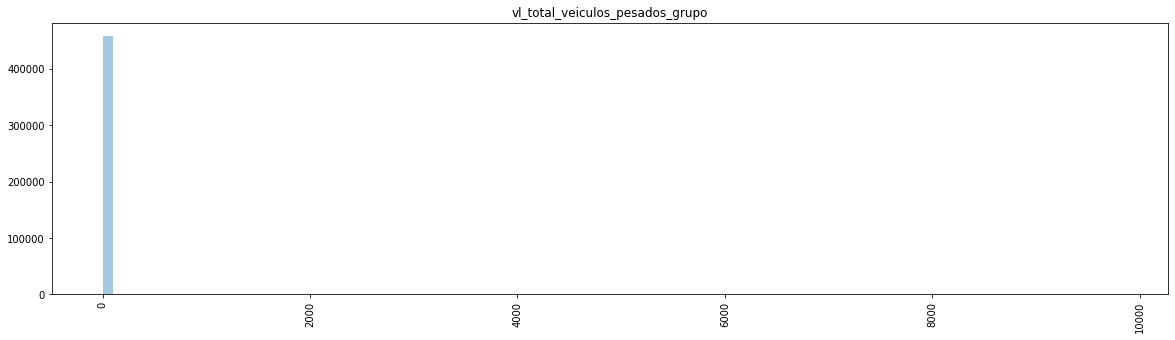

In [64]:
analyze_feature_data(df, "vl_total_veiculos_pesados_grupo", "N")

In [65]:
analyze_grouped_feature_data(df, "vl_total_veiculos_pesados_grupo", "N")

###################################################
Empresa 1
0 - 3.5950967343459124
1 - 0.8612612612612612
###################################################
Empresa 2
0 - 3.5834103587390307
1 - 10.408127208480565
###################################################
Empresa 3
0 - 3.589385924113139
1 - 7.784905660377358


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


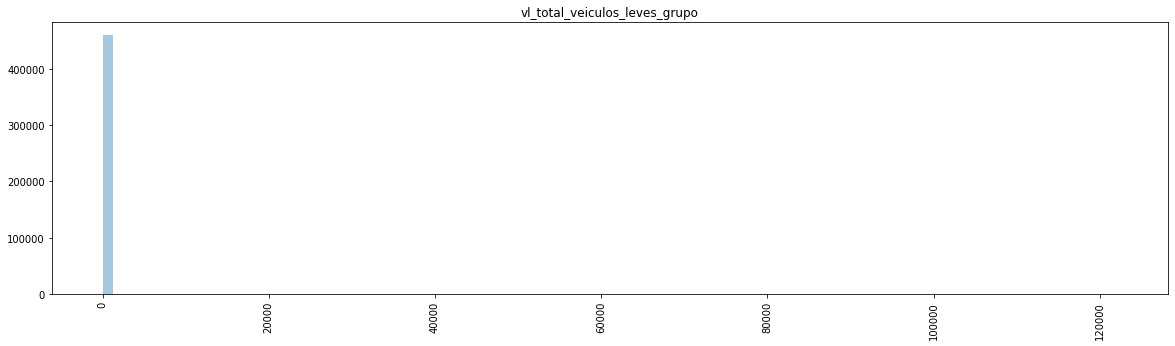

In [66]:
analyze_feature_data(df, "vl_total_veiculos_leves_grupo", "N")

In [67]:
analyze_grouped_feature_data(df, "vl_total_veiculos_leves_grupo", "N")

###################################################
Empresa 1
0 - 48.75730292116847
1 - 0.5423423423423424
###################################################
Empresa 2
0 - 48.74468959667685
1 - 11.726148409893993
###################################################
Empresa 3
0 - 48.72107731696609
1 - 10.675471698113208


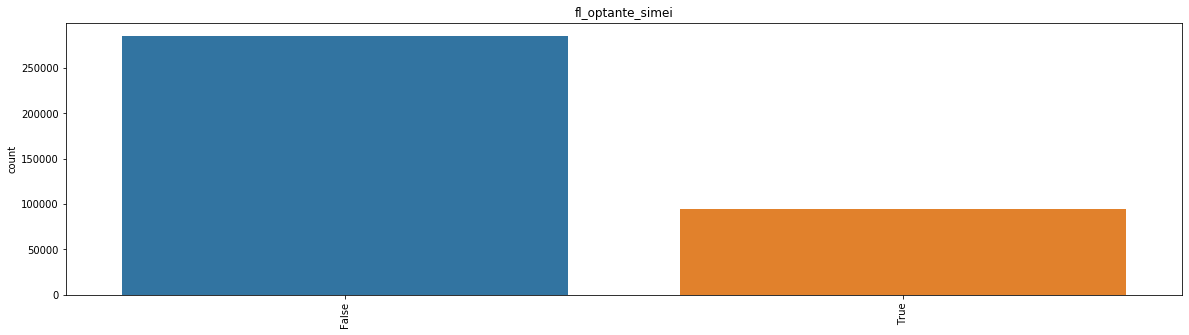

In [68]:
analyze_feature_data(df, "fl_optante_simei", "C")

In [69]:
analyze_grouped_feature_data(df, "fl_optante_simei", "C")

###################################################
Empresa 1
False - 316
True - 138
###################################################
Empresa 2
False - 566
True - 0
###################################################
Empresa 3
False - 263
True - 0


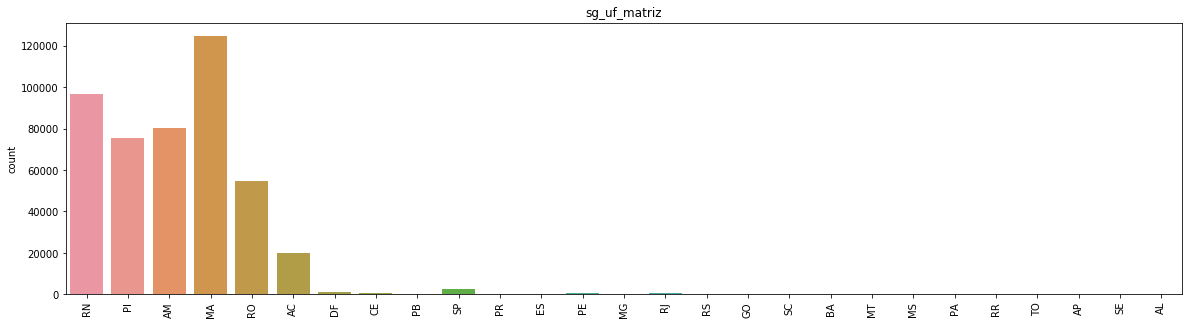

In [70]:
analyze_feature_data(df, "sg_uf_matriz", "C")

In [71]:
analyze_grouped_feature_data(df, "sg_uf_matriz", "C")

###################################################
Empresa 1
AC - 22
AL - 0
AM - 93
AP - 0
BA - 0
CE - 1
DF - 0
ES - 0
GO - 0
MA - 156
MG - 0
MS - 0
MT - 0
PA - 0
PB - 0
PE - 0
PI - 103
PR - 0
RJ - 0
RN - 116
RO - 64
RR - 0
RS - 0
SC - 0
SE - 0
SP - 0
TO - 0
###################################################
Empresa 2
AC - 35
AL - 0
AM - 142
AP - 0
BA - 0
CE - 0
DF - 0
ES - 0
GO - 0
MA - 118
MG - 0
MS - 0
MT - 0
PA - 0
PB - 0
PE - 0
PI - 101
PR - 0
RJ - 0
RN - 100
RO - 70
RR - 0
RS - 0
SC - 0
SE - 0
SP - 0
TO - 0
###################################################
Empresa 3
AC - 23
AL - 0
AM - 43
AP - 0
BA - 0
CE - 0
DF - 0
ES - 0
GO - 0
MA - 74
MG - 0
MS - 0
MT - 0
PA - 0
PB - 0
PE - 0
PI - 52
PR - 0
RJ - 0
RN - 51
RO - 22
RR - 0
RS - 0
SC - 0
SE - 0
SP - 0
TO - 0


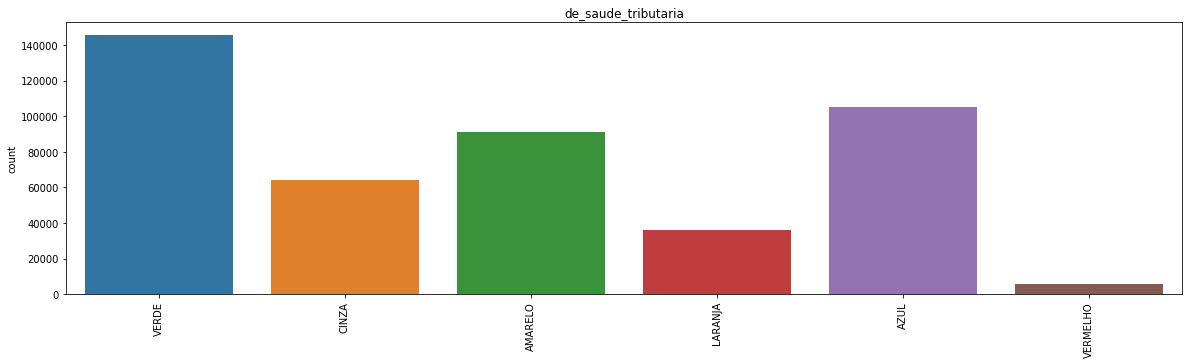

In [72]:
analyze_feature_data(df, "de_saude_tributaria", "C")

In [73]:
analyze_grouped_feature_data(df, "de_saude_tributaria", "C")

###################################################
Empresa 1
AMARELO - 113
AZUL - 128
CINZA - 86
LARANJA - 47
VERDE - 167
VERMELHO - 3
###################################################
Empresa 2
AMARELO - 1
AZUL - 134
CINZA - 0
LARANJA - 44
VERDE - 376
VERMELHO - 11
###################################################
Empresa 3
AMARELO - 0
AZUL - 83
CINZA - 1
LARANJA - 20
VERDE - 159
VERMELHO - 2


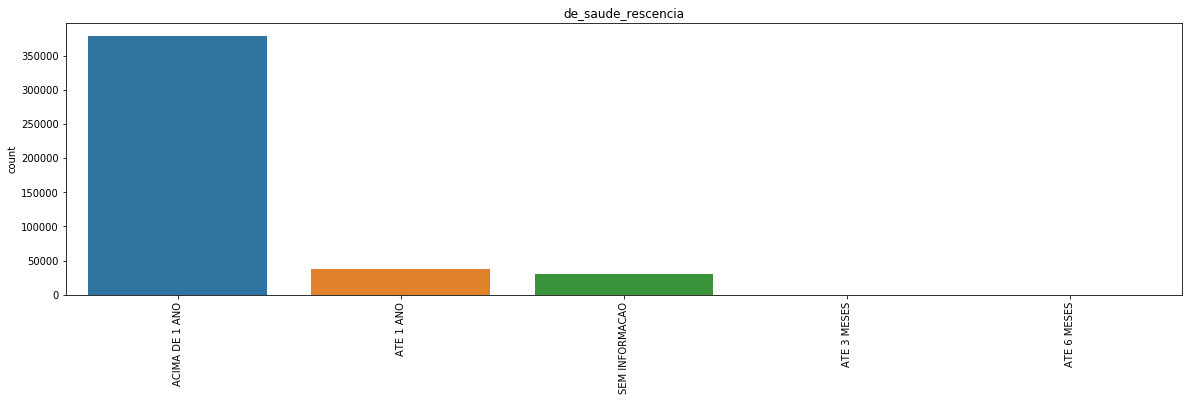

In [74]:
analyze_feature_data(df, "de_saude_rescencia", "C")

In [75]:
analyze_grouped_feature_data(df, "de_saude_rescencia", "C")

###################################################
Empresa 1
ACIMA DE 1 ANO - 453
ATE 1 ANO - 55
ATE 3 MESES - 0
ATE 6 MESES - 0
SEM INFORMACAO - 36
###################################################
Empresa 2
ACIMA DE 1 ANO - 566
ATE 1 ANO - 0
ATE 3 MESES - 0
ATE 6 MESES - 0
SEM INFORMACAO - 0
###################################################
Empresa 3
ACIMA DE 1 ANO - 263
ATE 1 ANO - 1
ATE 3 MESES - 0
ATE 6 MESES - 0
SEM INFORMACAO - 1


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


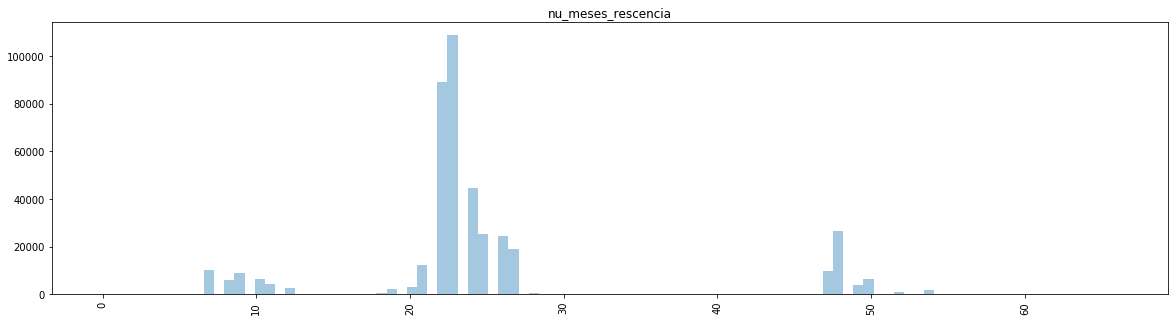

In [76]:
analyze_feature_data(df, "nu_meses_rescencia", "N")

In [77]:
analyze_grouped_feature_data(df, "nu_meses_rescencia", "N")

###################################################
Empresa 1
0 - 25.007533960443105
1 - 24.771653543307085
###################################################
Empresa 2
0 - 25.007592638838197
1 - 24.752650176678443
###################################################
Empresa 3
0 - 25.007416774243087
1 - 24.738636363636363


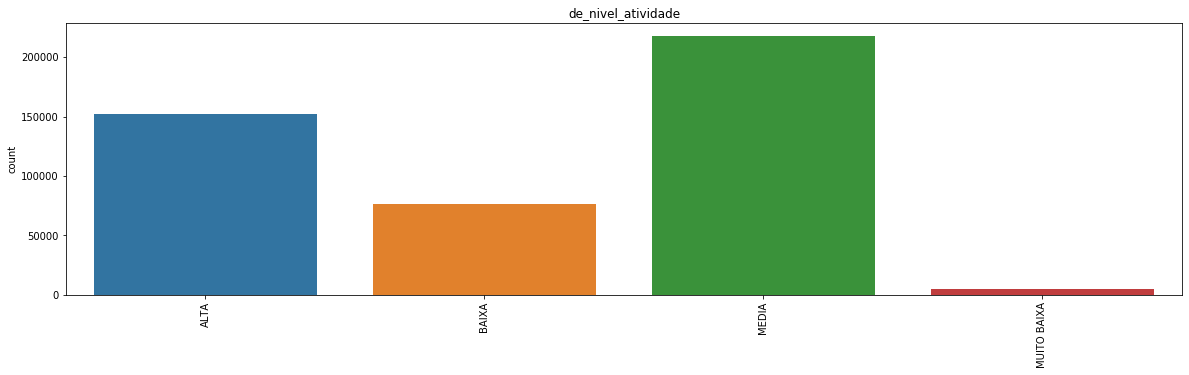

In [78]:
analyze_feature_data(df, "de_nivel_atividade", "C")

In [79]:
analyze_grouped_feature_data(df, "de_nivel_atividade", "C")

###################################################
Empresa 1
ALTA - 153
BAIXA - 116
MEDIA - 280
MUITO BAIXA - 2
###################################################
Empresa 2
ALTA - 523
BAIXA - 6
MEDIA - 37
MUITO BAIXA - 0
###################################################
Empresa 3
ALTA - 236
BAIXA - 3
MEDIA - 26
MUITO BAIXA - 0


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


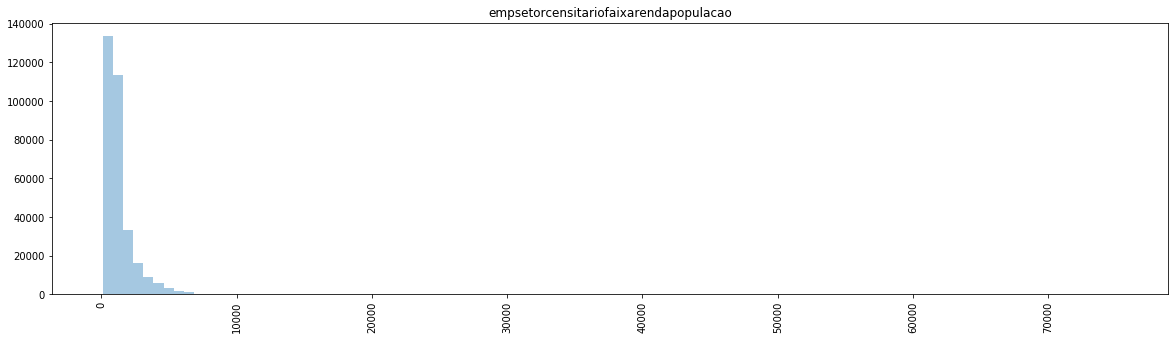

In [80]:
analyze_feature_data(df, "empsetorcensitariofaixarendapopulacao", "N")

In [81]:
analyze_grouped_feature_data(df, "empsetorcensitariofaixarendapopulacao", "N")

###################################################
Empresa 1
0 - 1308.2317060403388
1 - 1130.532765432099
###################################################
Empresa 2
0 - 1307.3596240561753
1 - 1722.2043951612907
###################################################
Empresa 3
0 - 1307.815419667478
1 - 1587.1068202764982


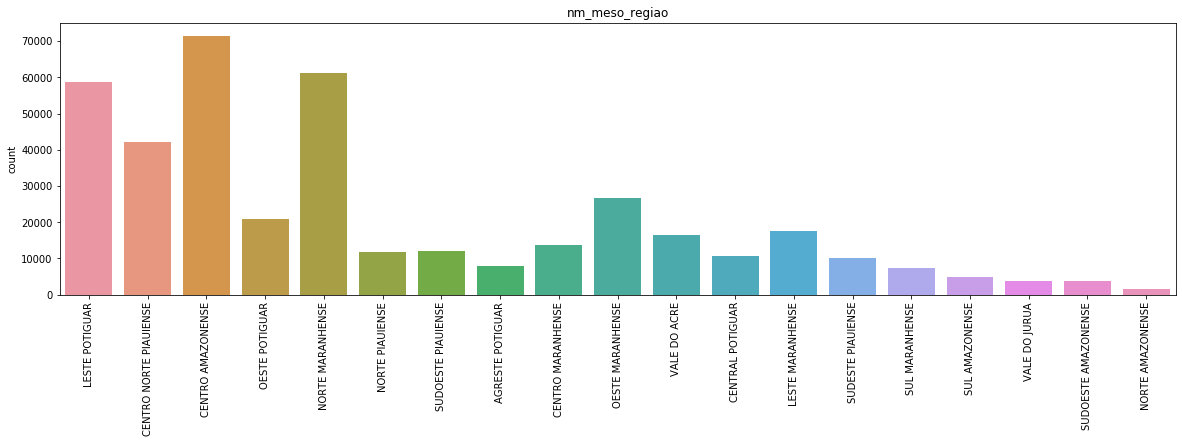

In [82]:
analyze_feature_data(df, "nm_meso_regiao", "C")

In [83]:
analyze_grouped_feature_data(df, "nm_meso_regiao", "C")

###################################################
Empresa 1
AGRESTE POTIGUAR - 9
CENTRAL POTIGUAR - 12
CENTRO AMAZONENSE - 78
CENTRO MARANHENSE - 21
CENTRO NORTE PIAUIENSE - 55
LESTE MARANHENSE - 25
LESTE POTIGUAR - 77
NORTE AMAZONENSE - 2
NORTE MARANHENSE - 65
NORTE PIAUIENSE - 16
OESTE MARANHENSE - 36
OESTE POTIGUAR - 18
SUDESTE PIAUIENSE - 17
SUDOESTE AMAZONENSE - 6
SUDOESTE PIAUIENSE - 15
SUL AMAZONENSE - 8
SUL MARANHENSE - 10
VALE DO ACRE - 20
VALE DO JURUA - 1
###################################################
Empresa 2
AGRESTE POTIGUAR - 12
CENTRAL POTIGUAR - 8
CENTRO AMAZONENSE - 138
CENTRO MARANHENSE - 14
CENTRO NORTE PIAUIENSE - 62
LESTE MARANHENSE - 11
LESTE POTIGUAR - 52
NORTE AMAZONENSE - 2
NORTE MARANHENSE - 66
NORTE PIAUIENSE - 10
OESTE MARANHENSE - 16
OESTE POTIGUAR - 28
SUDESTE PIAUIENSE - 15
SUDOESTE AMAZONENSE - 2
SUDOESTE PIAUIENSE - 14
SUL AMAZONENSE - 0
SUL MARANHENSE - 11
VALE DO ACRE - 32
VALE DO JURUA - 3
###################################################
E

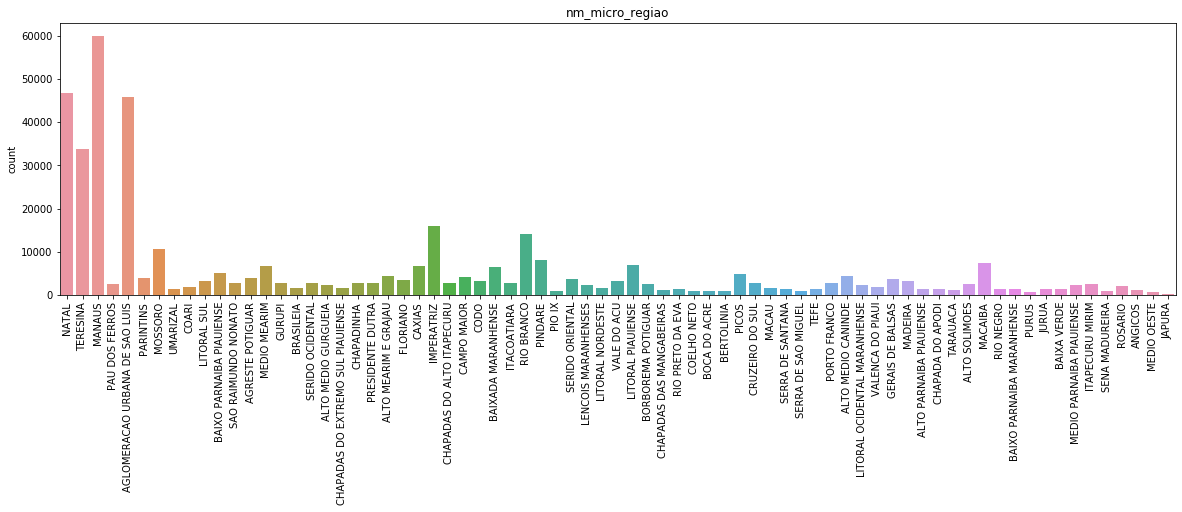

In [84]:
analyze_feature_data(df, "nm_micro_regiao", "C")

In [85]:
analyze_grouped_feature_data(df, "nm_micro_regiao", "C")

###################################################
Empresa 1
AGLOMERACAO URBANA DE SAO LUIS - 48
AGRESTE POTIGUAR - 4
ALTO MEARIM E GRAJAU - 7
ALTO MEDIO CANINDE - 9
ALTO MEDIO GURGUEIA - 2
ALTO PARNAIBA PIAUIENSE - 1
ALTO SOLIMOES - 2
ANGICOS - 2
BAIXA VERDE - 2
BAIXADA MARANHENSE - 5
BAIXO PARNAIBA MARANHENSE - 2
BAIXO PARNAIBA PIAUIENSE - 8
BERTOLINIA - 2
BOCA DO ACRE - 1
BORBOREMA POTIGUAR - 3
BRASILEIA - 1
CAMPO MAIOR - 8
CAXIAS - 7
CHAPADA DO APODI - 2
CHAPADAS DAS MANGABEIRAS - 1
CHAPADAS DO ALTO ITAPECURU - 4
CHAPADAS DO EXTREMO SUL PIAUIENSE - 2
CHAPADINHA - 7
COARI - 4
CODO - 4
COELHO NETO - 1
CRUZEIRO DO SUL - 0
FLORIANO - 4
GERAIS DE BALSAS - 4
GURUPI - 5
IMPERATRIZ - 20
ITACOATIARA - 5
ITAPECURU MIRIM - 3
JAPURA - 0
JURUA - 4
LENCOIS MARANHENSES - 5
LITORAL NORDESTE - 4
LITORAL OCIDENTAL MARANHENSE - 4
LITORAL PIAUIENSE - 8
LITORAL SUL - 10
MACAIBA - 5
MACAU - 3
MADEIRA - 7
MANAUS - 65
MEDIO MEARIM - 9
MEDIO OESTE - 0
MEDIO PARNAIBA PIAUIENSE - 3
MOSSORO - 8
NATAL - 58
PA

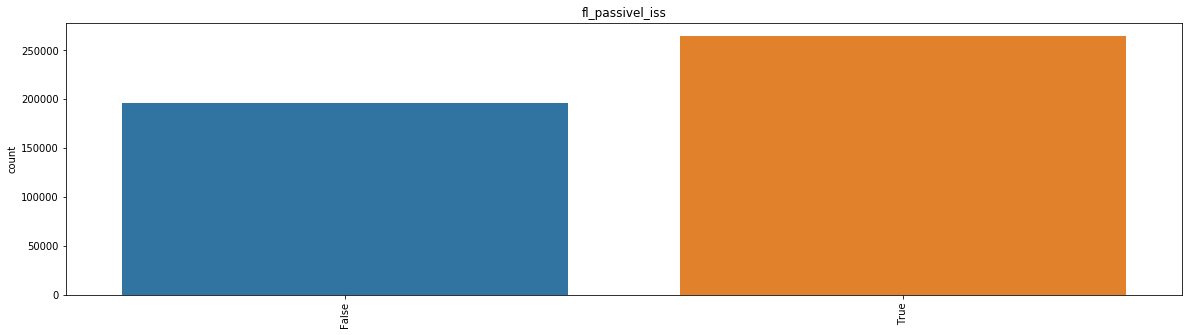

In [86]:
analyze_feature_data(df, "fl_passivel_iss", "C")

In [87]:
analyze_grouped_feature_data(df, "fl_passivel_iss", "C")

###################################################
Empresa 1
False - 442
True - 113
###################################################
Empresa 2
False - 76
True - 490
###################################################
Empresa 3
False - 0
True - 265


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


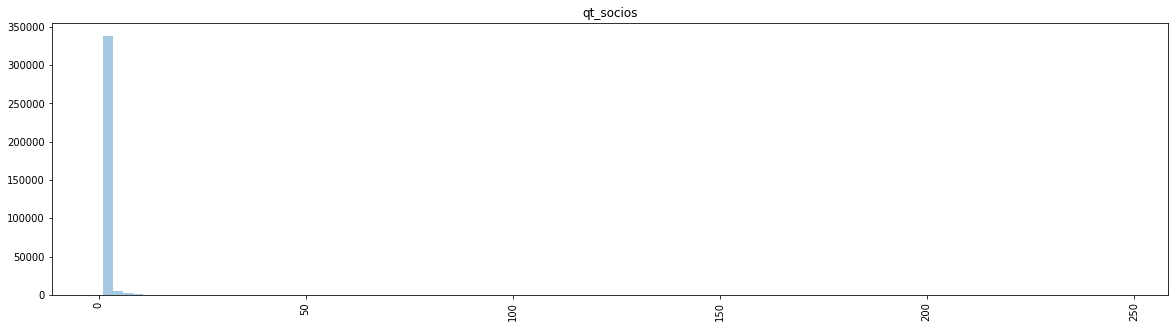

In [88]:
analyze_feature_data(df, "qt_socios", "N")

In [89]:
analyze_grouped_feature_data(df, "qt_socios", "N")

###################################################
Empresa 1
0 - 1.49658159337253
1 - 1.2794117647058822
###################################################
Empresa 2
0 - 1.4945606573920565
1 - 3.099476439790576
###################################################
Empresa 3
0 - 1.4956166506774529
1 - 4.010204081632653


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


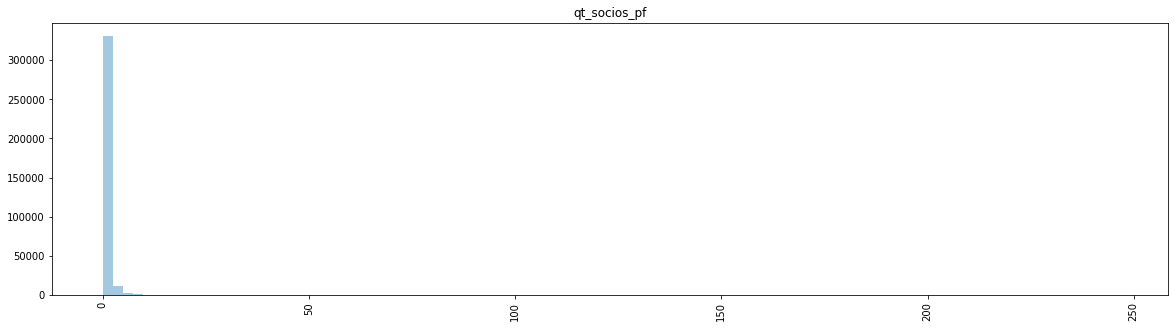

In [90]:
analyze_feature_data(df, "qt_socios_pf", "N")

In [91]:
analyze_grouped_feature_data(df, "qt_socios_pf", "N")

###################################################
Empresa 1
0 - 1.4769217904319216
1 - 1.2720588235294117
###################################################
Empresa 2
0 - 1.4750897426656095
1 - 2.9214659685863875
###################################################
Empresa 3
0 - 1.4760377864013898
1 - 3.7551020408163267


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


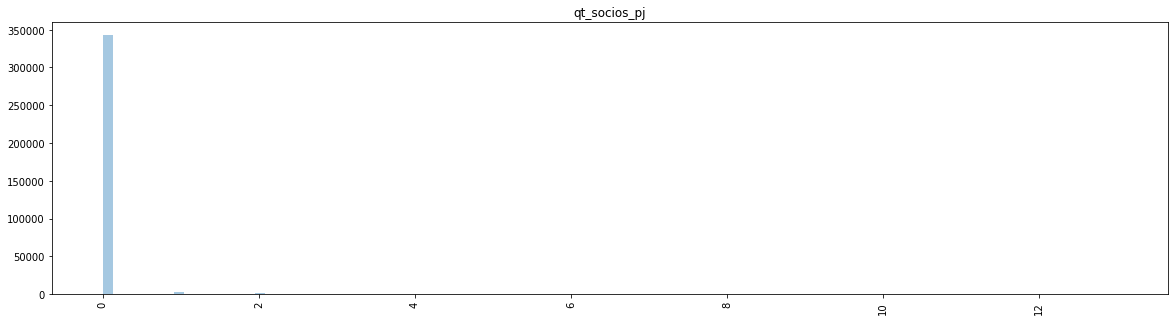

In [92]:
analyze_feature_data(df, "qt_socios_pj", "N")

In [93]:
analyze_grouped_feature_data(df, "qt_socios_pj", "N")

###################################################
Empresa 1
0 - 0.019659802940608248
1 - 0.007352941176470588
###################################################
Empresa 2
0 - 0.019470914726447054
1 - 0.17801047120418848
###################################################
Empresa 3
0 - 0.01957886427606314
1 - 0.25510204081632654


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


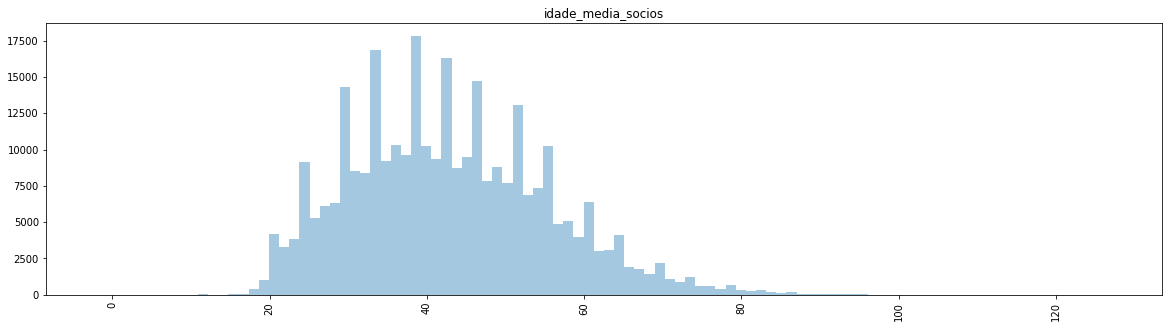

In [94]:
analyze_feature_data(df, "idade_media_socios", "N")

In [95]:
analyze_grouped_feature_data(df, "idade_media_socios", "N")

###################################################
Empresa 1
0 - 42.81769221055915
1 - 41.753222836095766
###################################################
Empresa 2
0 - 42.80651041948803
1 - 51.556651623666326
###################################################
Empresa 3
0 - 42.8143162386925
1 - 49.949402706727355


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


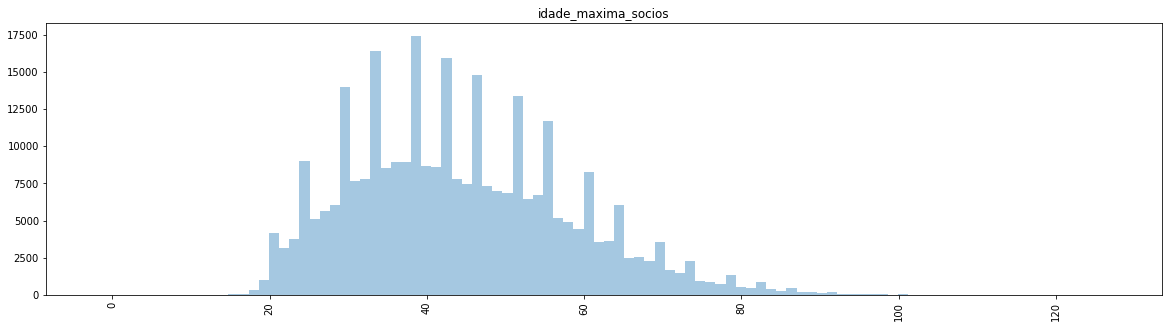

In [96]:
analyze_feature_data(df, "idade_maxima_socios", "N")

In [97]:
analyze_grouped_feature_data(df, "idade_maxima_socios", "N")

###################################################
Empresa 1
0 - 44.345846732874904
1 - 42.87292817679558
###################################################
Empresa 2
0 - 44.329042382138475
1 - 57.609065155807365
###################################################
Empresa 3
0 - 44.34094970106535
1 - 54.96774193548387


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


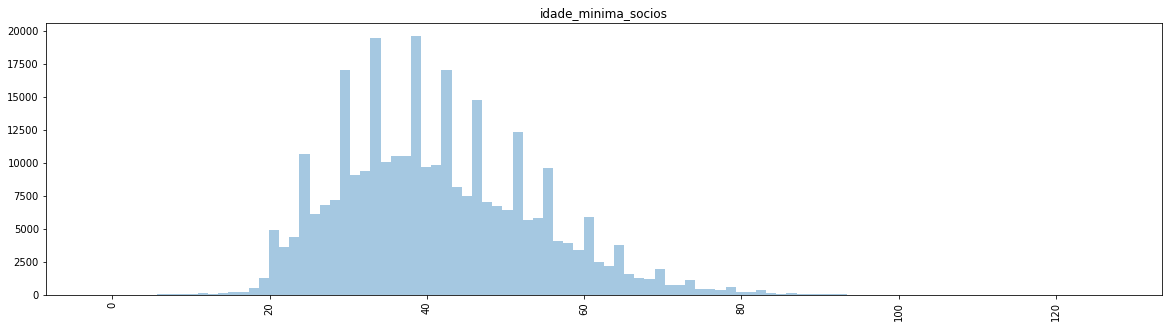

In [98]:
analyze_feature_data(df, "idade_minima_socios", "N")

In [99]:
analyze_grouped_feature_data(df, "idade_minima_socios", "N")

###################################################
Empresa 1
0 - 41.356000309344125
1 - 40.69060773480663
###################################################
Empresa 2
0 - 41.349909616134404
1 - 46.02832861189802
###################################################
Empresa 3
0 - 41.35404358618558
1 - 45.30107526881721


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


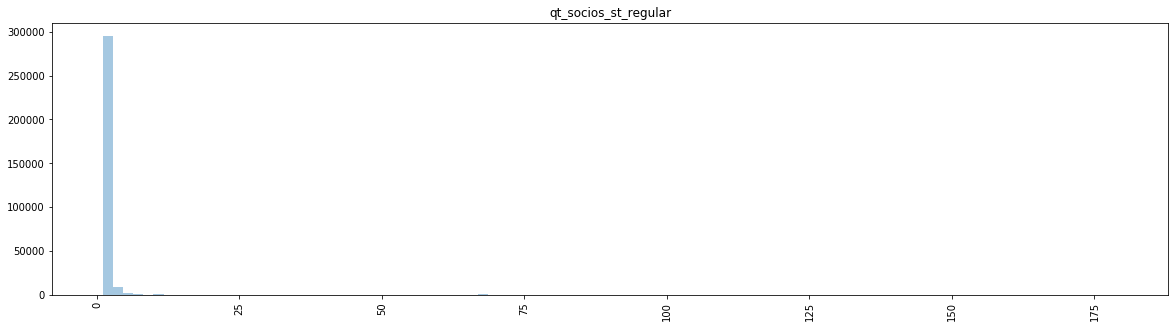

In [100]:
analyze_feature_data(df, "qt_socios_st_regular", "N")

In [101]:
analyze_grouped_feature_data(df, "qt_socios_st_regular", "N")

###################################################
Empresa 1
0 - 1.396318167161204
1 - 1.1944444444444444
###################################################
Empresa 2
0 - 1.394718414221458
1 - 2.585227272727273
###################################################
Empresa 3
0 - 1.3955637707948243
1 - 3.10752688172043


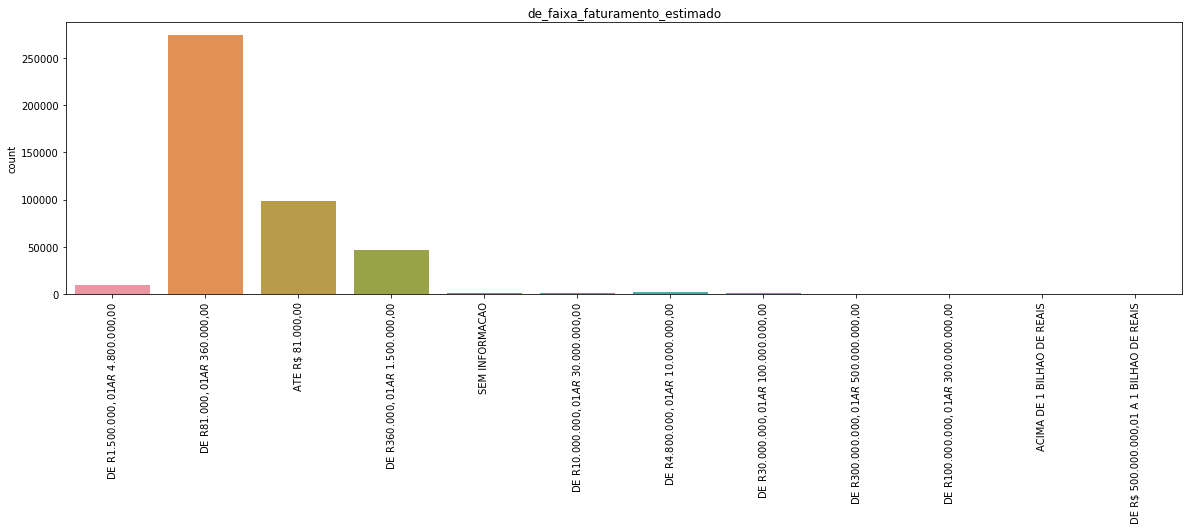

In [102]:
analyze_feature_data(df, "de_faixa_faturamento_estimado", "C")

In [103]:
analyze_grouped_feature_data(df, "de_faixa_faturamento_estimado", "C")

###################################################
Empresa 1
ACIMA DE 1 BILHAO DE REAIS - 0
ATE R$ 81.000,00 - 144
DE R$ 1.500.000,01 A R$ 4.800.000,00 - 16
DE R$ 10.000.000,01 A R$ 30.000.000,00 - 1
DE R$ 100.000.000,01 A R$ 300.000.000,00 - 0
DE R$ 30.000.000,01 A R$ 100.000.000,00 - 0
DE R$ 300.000.000,01 A R$ 500.000.000,00 - 0
DE R$ 360.000,01 A R$ 1.500.000,00 - 41
DE R$ 4.800.000,01 A R$ 10.000.000,00 - 1
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS - 0
DE R$ 81.000,01 A R$ 360.000,00 - 325
SEM INFORMACAO - 2
###################################################
Empresa 2
ACIMA DE 1 BILHAO DE REAIS - 5
ATE R$ 81.000,00 - 0
DE R$ 1.500.000,01 A R$ 4.800.000,00 - 0
DE R$ 10.000.000,01 A R$ 30.000.000,00 - 278
DE R$ 100.000.000,01 A R$ 300.000.000,00 - 58
DE R$ 30.000.000,01 A R$ 100.000.000,00 - 202
DE R$ 300.000.000,01 A R$ 500.000.000,00 - 15
DE R$ 360.000,01 A R$ 1.500.000,00 - 0
DE R$ 4.800.000,01 A R$ 10.000.000,00 - 0
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS - 8
DE R$ 81.000,01 A

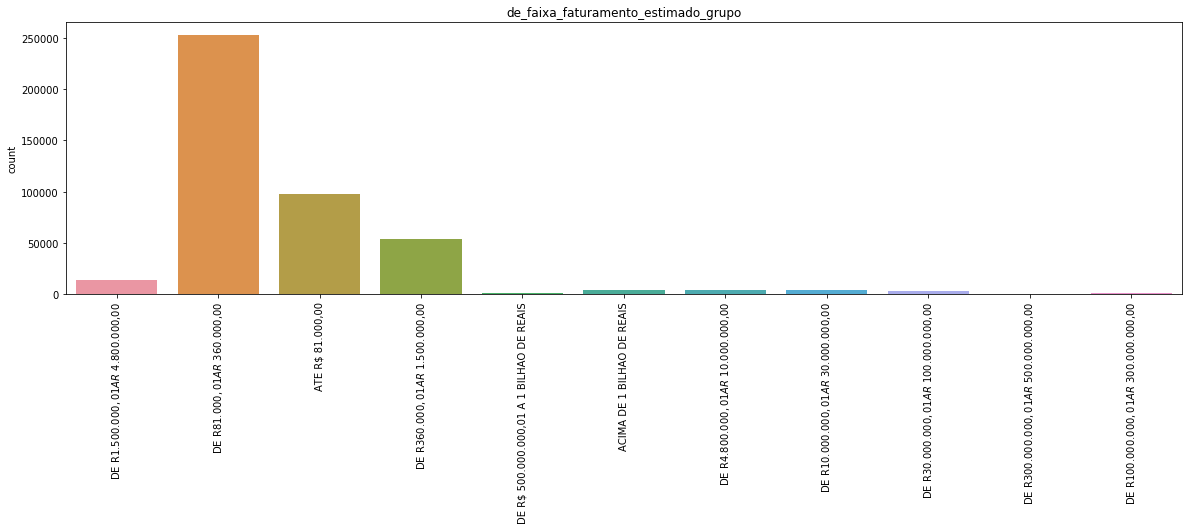

In [104]:
analyze_feature_data(df, "de_faixa_faturamento_estimado_grupo", "C")

In [105]:
analyze_grouped_feature_data(df, "de_faixa_faturamento_estimado_grupo", "C")

###################################################
Empresa 1
ACIMA DE 1 BILHAO DE REAIS - 1
ATE R$ 81.000,00 - 143
DE R$ 1.500.000,01 A R$ 4.800.000,00 - 18
DE R$ 10.000.000,01 A R$ 30.000.000,00 - 5
DE R$ 100.000.000,01 A R$ 300.000.000,00 - 0
DE R$ 30.000.000,01 A R$ 100.000.000,00 - 2
DE R$ 300.000.000,01 A R$ 500.000.000,00 - 1
DE R$ 360.000,01 A R$ 1.500.000,00 - 58
DE R$ 4.800.000,01 A R$ 10.000.000,00 - 6
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS - 0
DE R$ 81.000,01 A R$ 360.000,00 - 296
###################################################
Empresa 2
ACIMA DE 1 BILHAO DE REAIS - 8
ATE R$ 81.000,00 - 0
DE R$ 1.500.000,01 A R$ 4.800.000,00 - 0
DE R$ 10.000.000,01 A R$ 30.000.000,00 - 247
DE R$ 100.000.000,01 A R$ 300.000.000,00 - 78
DE R$ 30.000.000,01 A R$ 100.000.000,00 - 210
DE R$ 300.000.000,01 A R$ 500.000.000,00 - 14
DE R$ 360.000,01 A R$ 1.500.000,00 - 0
DE R$ 4.800.000,01 A R$ 10.000.000,00 - 0
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS - 9
DE R$ 81.000,01 A R$ 360.000,00 - 0


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


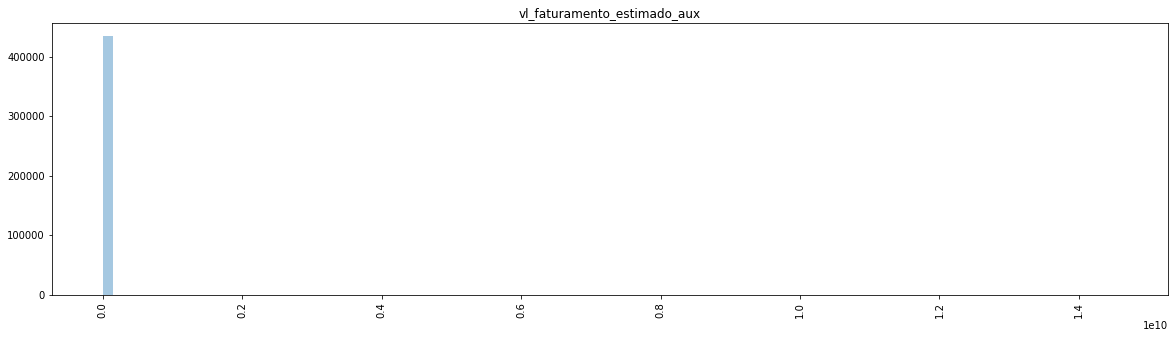

In [106]:
analyze_feature_data(df, "vl_faturamento_estimado_aux", "N")

In [107]:
analyze_grouped_feature_data(df, "vl_faturamento_estimado_aux", "N")

###################################################
Empresa 1
0 - 802677.2625705414
1 - 321850.3622641508
###################################################
Empresa 2
0 - 697490.2778818458
1 - 81048876.99293286
###################################################
Empresa 3
0 - 736709.7299999417
1 - 108007862.1509434


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


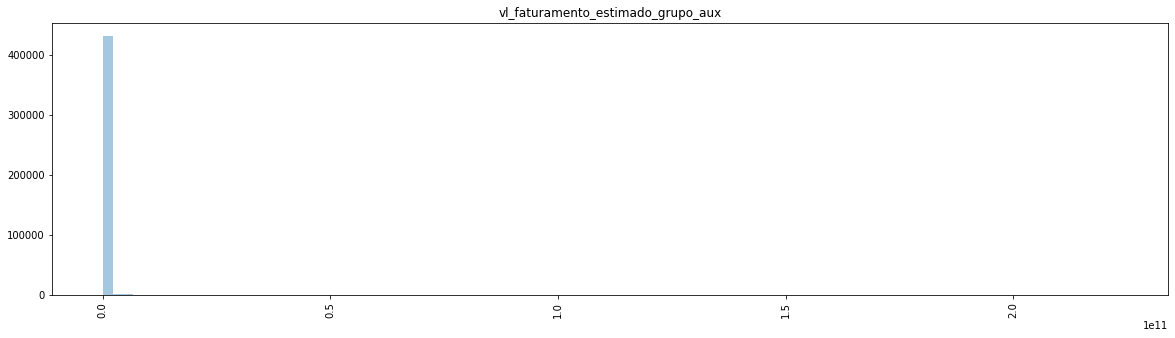

In [108]:
analyze_feature_data(df, "vl_faturamento_estimado_grupo_aux", "N")

In [109]:
analyze_grouped_feature_data(df, "vl_faturamento_estimado_grupo_aux", "N")

###################################################
Empresa 1
0 - 337123729.3449131
1 - 6359388.406415088
###################################################
Empresa 2
0 - 337029223.4214778
1 - 99899642.5441696
###################################################
Empresa 3
0 - 336856267.81056947
1 - 114151220.68679245


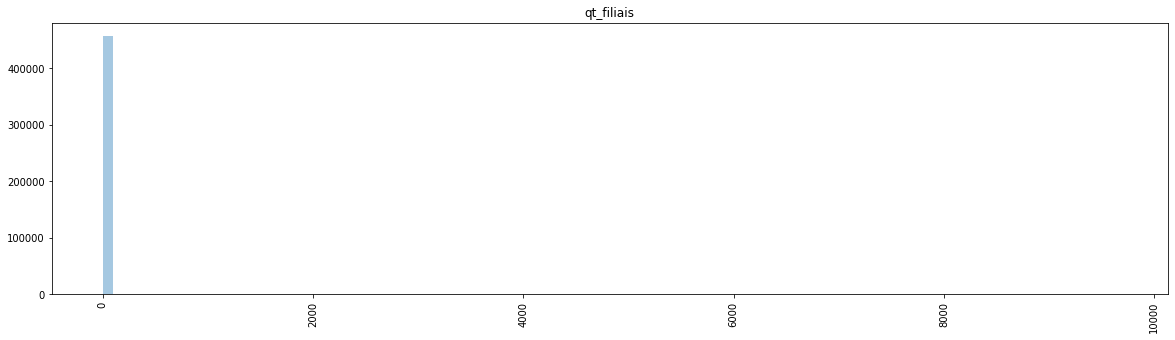

In [110]:
analyze_feature_data(df, "qt_filiais", "N")

In [122]:
analyze_grouped_feature_data(df, "qt_filiais", "N")

###################################################
Empresa 1
0 - 28.77009938428953
1 - 1.236036036036036
###################################################
Empresa 2
0 - 28.76806026006428
1 - 3.4346289752650176
###################################################
Empresa 3
0 - 28.752060999971864
1 - 2.5547169811320756


In [113]:
df.to_csv("pre_processed_data.csv", index = False)